In [1]:
import numpy as np
import os
from PIL import Image
from pathlib import Path
import cv2
from IPython.display import display
import matplotlib.pyplot as plt
import pickle

In [2]:
extensions = ['.npy']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                image = './images_aggregate'+'/'+filename
                image = image.replace('.npy','.jpg')
                file_list.append(image)
                counter += 1
    return file_list

In [3]:
root_dir = './feature_vectors_resnet/train'
filenames = sorted(get_file_list(root_dir))

In [4]:
pickle.dump(filenames, open('filenames-features-origin.pickle','wb'))

In [5]:
filenames = pickle.load(open('filenames-features-origin.pickle', 'rb'))

In [6]:
features = []
img_paths = []

for feature_path in Path("./feature_vectors_resnet/train").glob("*.npy"):
    fv = np.load(feature_path)
    features.append(fv)
    img_paths.append(Path("./images_aggregate") / (feature_path.stem + ".jpg"))
features = np.array(features)

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [8]:
class_ids = []
for i in range(len(features)):
    class_ids.append(i)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4035 samples in 0.001s...
[t-SNE] Computed neighbors for 4035 samples in 0.707s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4035
[t-SNE] Computed conditional probabilities for sample 2000 / 4035
[t-SNE] Computed conditional probabilities for sample 3000 / 4035
[t-SNE] Computed conditional probabilities for sample 4000 / 4035
[t-SNE] Computed conditional probabilities for sample 4035 / 4035
[t-SNE] Mean sigma: 0.177026
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.399155
[t-SNE] KL divergence after 1000 iterations: 1.486947


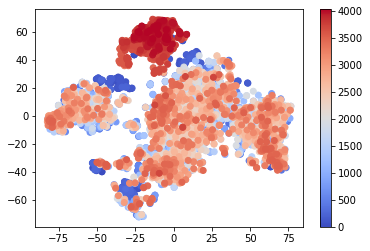

In [9]:
num_feature_dimensions=256     
pca = PCA(n_components = num_feature_dimensions)
pca.fit(features)
feature_list_compressed = pca.transform(features)

selected_features = feature_list_compressed
selected_class_ids = class_ids

tsne_results = TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(selected_features)

colormap = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1], c = selected_class_ids, cmap=colormap)
plt.colorbar(scatter_plot)
plt.show()

In [8]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

In [9]:
def plot_images_in_2d(x, y, image_paths, axis=None, zoom=1):
    if axis is None:
        axis = plt.gca()
    x, y = np.atleast_1d(x, y)
    for x0, y0, image_path in zip(x, y, image_paths):
        image = Image.open(image_path)
        image.thumbnail((100, 100), Image.ANTIALIAS)
        img = OffsetImage(image, zoom=zoom)
        anno_box = AnnotationBbox(img, (x0, y0),
                                  xycoords='data',
                                  frameon=False)
        axis.add_artist(anno_box)
    axis.update_datalim(np.column_stack([x, y]))
    axis.autoscale()
    
def show_tsne(x, y, selected_filenames):
    fig, axis = plt.subplots()
    fig.set_size_inches(22, 22, forward=True)
    plot_images_in_2d(x, y, selected_filenames, zoom=0.3, axis=axis)
    plt.show()

In [10]:
def tsne_to_grid_plotter_manual(x, y, selected_filenames):
    S = 2000
    s = 100
    x = (x - min(x)) / (max(x) - min(x))
    y = (y - min(y)) / (max(y) - min(y))
    x_values = []
    y_values = []
    filename_plot = []
    x_y_dict = {}
    for i, image_path in enumerate(selected_filenames):
        a = np.ceil(x[i] * (S - s))
        b = np.ceil(y[i] * (S - s))
        a = int(a - np.mod(a, s))
        b = int(b - np.mod(b, s))
        if str(a) + "|" + str(b) in x_y_dict:
            continue
        x_y_dict[str(a) + "|" + str(b)] = 1
        x_values.append(a)
        y_values.append(b)
        filename_plot.append(image_path)
    fig, axis = plt.subplots()
    fig.set_size_inches(22, 22, forward=True)
    plot_images_in_2d(x_values, y_values, filename_plot, zoom=.58, axis=axis)
    plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4035 samples in 0.001s...
[t-SNE] Computed neighbors for 4035 samples in 0.332s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4035
[t-SNE] Computed conditional probabilities for sample 2000 / 4035
[t-SNE] Computed conditional probabilities for sample 3000 / 4035
[t-SNE] Computed conditional probabilities for sample 4000 / 4035
[t-SNE] Computed conditional probabilities for sample 4035 / 4035
[t-SNE] Mean sigma: 0.166952
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.059647
[t-SNE] KL divergence after 1000 iterations: 1.467429


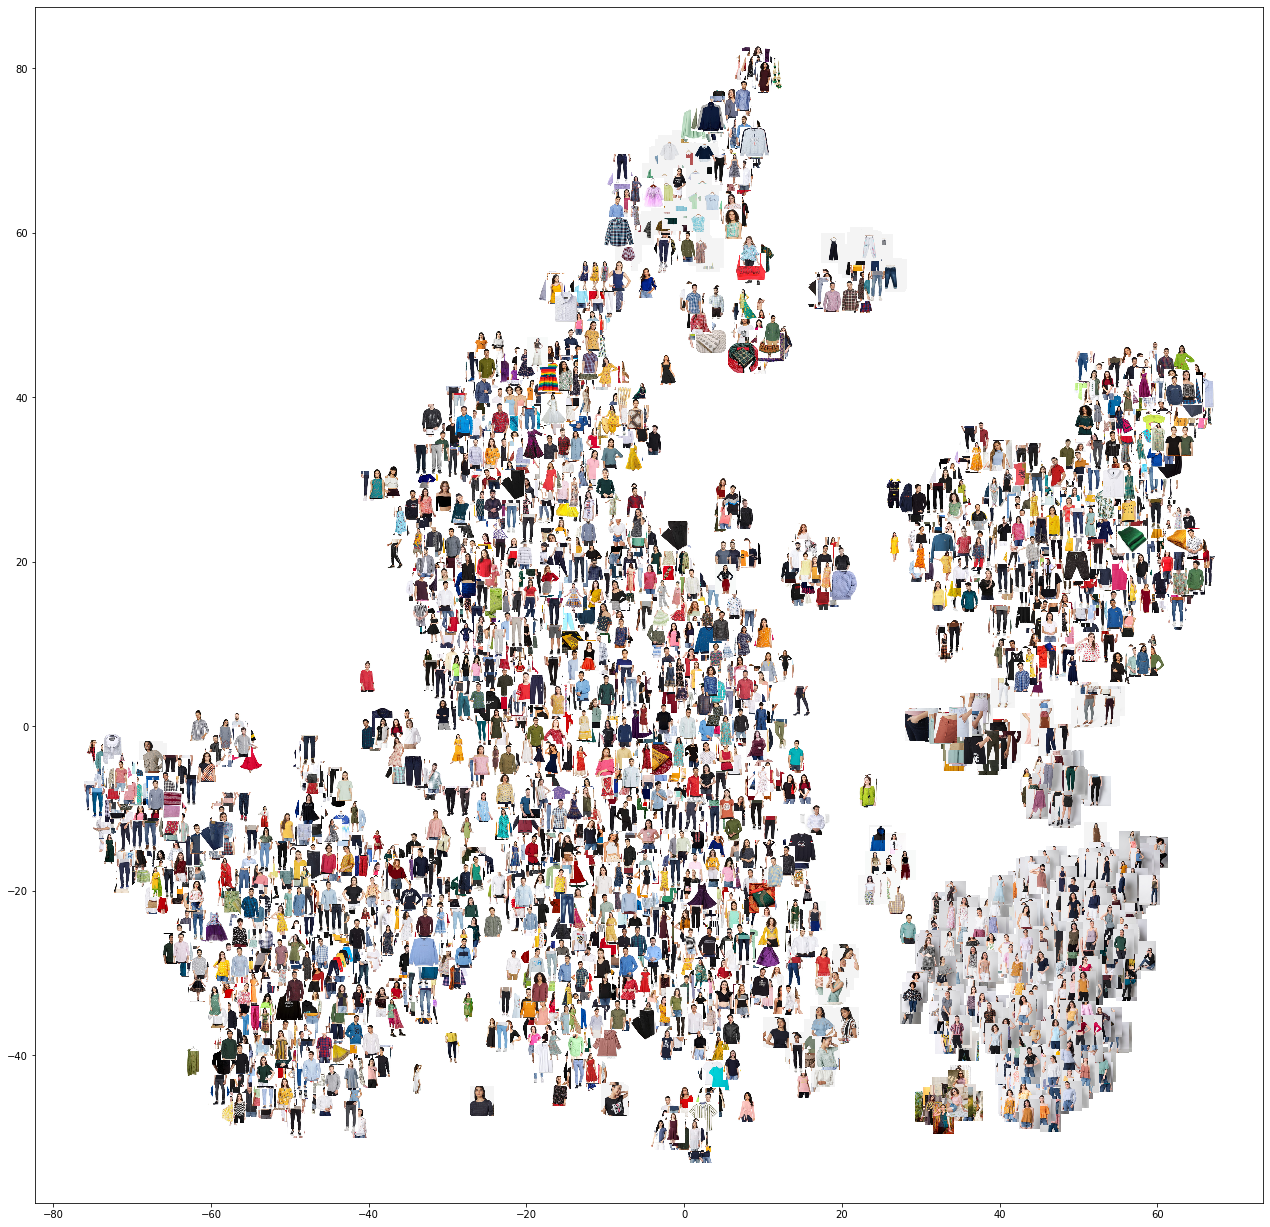

In [118]:
# Perform PCA over the features
num_feature_dimensions=100      # Set the number of features
pca = PCA(n_components = num_feature_dimensions)
pca.fit(features)
feature_list_compressed = pca.transform(features)

# For speed and clarity, we'll analyze about first half of the dataset.
selected_features = feature_list_compressed
selected_class_ids = class_ids
selected_filenames = filenames

tsne_results = TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(selected_features)

# Plot a scatter plot from the generated t-SNE results
colormap = plt.cm.get_cmap('coolwarm')
scatter_plot = show_tsne(tsne_results[:,0],tsne_results[:,1], selected_filenames)
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4035 samples in 0.008s...
[t-SNE] Computed neighbors for 4035 samples in 1.672s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4035
[t-SNE] Computed conditional probabilities for sample 2000 / 4035
[t-SNE] Computed conditional probabilities for sample 3000 / 4035
[t-SNE] Computed conditional probabilities for sample 4000 / 4035
[t-SNE] Computed conditional probabilities for sample 4035 / 4035
[t-SNE] Mean sigma: 0.180785
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.501976
[t-SNE] KL divergence after 1000 iterations: 1.502029


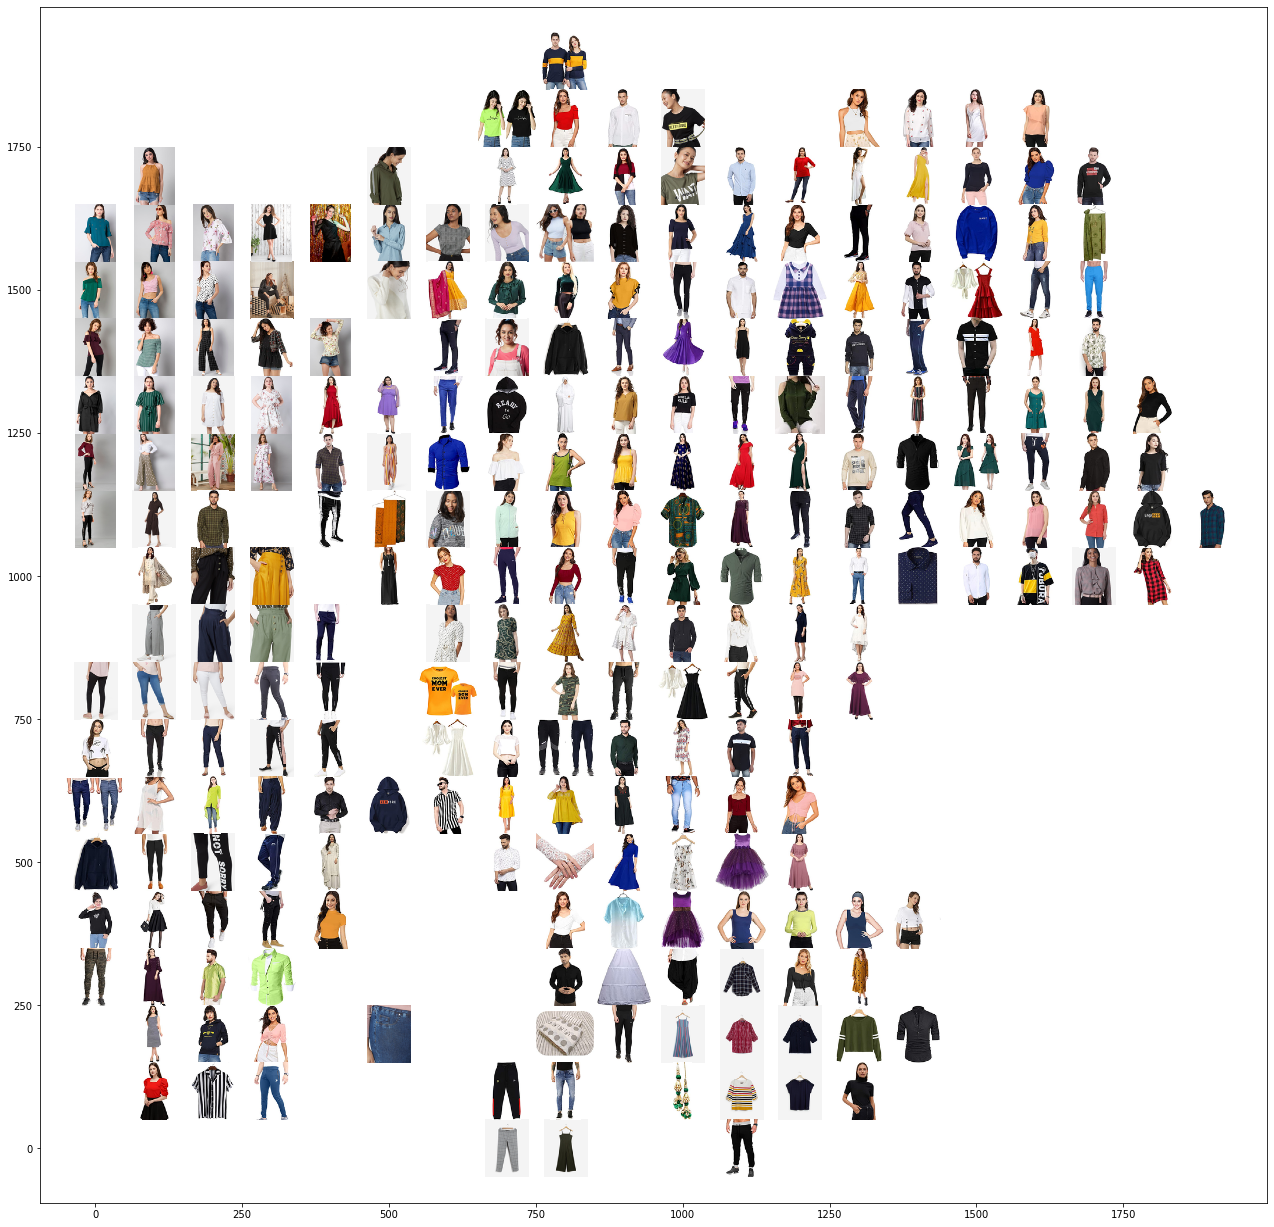

In [12]:
num_feature_dimensions=512   
pca = PCA(n_components = num_feature_dimensions)
pca.fit(features)
feature_list_compressed = pca.transform(features)

selected_features = feature_list_compressed
selected_filenames = filenames

tsne_results = TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(selected_features)

scatter_plot = tsne_to_grid_plotter_manual(tsne_results[:,0],tsne_results[:,1], selected_filenames)
plt.show()